In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning

In [2]:
# Reading merged data Arabica 98% and Robusta 2% of records
df_quality = pd.read_csv("data/merged_data_cleaned.csv")
df_quality.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
################### Quality Measures - Features ####################
# Aroma
# Flavor
# Aftertaste
# Acidity
# Body
# Balance
# Uniformity
# Cup Cleanliness
# Sweetness
# Moisture
# Defects
################### Bean Metadata - Labels ####################
# Species (arabica / robusta)
# Country of Origin
# Processing.Method'

df_quality = df_quality[['altitude_mean_meters', 'unit_of_measurement', 'Country.of.Origin', 'Species', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 
                         'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                         'Moisture', 'Category.One.Defects', 'Category.Two.Defects']]

In [4]:
# check for null values in data
df_quality.isnull().sum()

altitude_mean_meters    230
unit_of_measurement       0
Country.of.Origin         1
Species                   0
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Moisture                  0
Category.One.Defects      0
Category.Two.Defects      0
dtype: int64

In [5]:
# # From Data, it was evident that the only missing country was Columbia 
# # because the Owner "racafe & cia s.c.a" has records in Columbia only 
# # and In.Country.Partner column value "AlmacafÃ©" is only for Columbia and United States

df_quality['Country.of.Origin'] = df_quality['Country.of.Origin'].fillna('Colombia')
# Dropping all other null value rows
df_quality.dropna(inplace=True)
# checking again for null values in data
df_quality.isnull().sum()

altitude_mean_meters    0
unit_of_measurement     0
Country.of.Origin       0
Species                 0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Moisture                0
Category.One.Defects    0
Category.Two.Defects    0
dtype: int64

In [6]:
df_quality.loc[df_quality['unit_of_measurement']=="ft"]

,altitude_mean_meters,unit_of_measurement,Country.of.Origin,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Category.Two.Defects
13,609.600,ft,United States (Hawaii),Arabica,8.33,8.42,8.08,8.25,8.25,8.00,10.00,10.00,10.00,0.00,0,2
51,426.720,ft,United States (Hawaii),Arabica,8.33,8.17,7.75,8.00,7.75,7.83,10.00,10.00,10.00,0.00,0,0
57,1524.000,ft,Guatemala,Arabica,7.83,8.00,8.00,8.17,7.83,8.00,10.00,10.00,10.00,0.12,0,3
58,1417.320,ft,Guatemala,Arabica,8.00,8.00,7.83,8.33,7.83,7.83,10.00,10.00,10.00,0.10,0,1
69,1731.264,ft,Guatemala,Arabica,8.00,7.83,7.67,8.33,7.83,8.00,10.00,10.00,10.00,0.11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1219.200,ft,Guatemala,Arabica,7.33,7.00,6.83,7.17,7.17,7.17,9.33,9.33,9.33,0.10,1,2
1264,1310.640,ft,Guatemala,Arabica,7.50,7.00,6.83,7.50,7.17,7.33,8.67,8.67,8.67,0.11,0,8
1274,1310.640,ft,Guatemala,Arabica,7.92,7.58,7.17,7.58,7.33,7.17,8.00,8.00,8.00,0.11,0,15
1287,1310.640,ft,Guatemala,Arabica,6.50,6.33,6.50,7.50,7.33,6.83,8.67,10.00,8.67,0.11,1,1


*    m = ft /  3.2808

In [7]:
df_quality.loc[(df_quality['unit_of_measurement']=="ft"),'altitude_mean_meters'] = (df_quality['altitude_mean_meters'] / 3.2808)
df_quality.loc[df_quality['unit_of_measurement']=="ft"]

,altitude_mean_meters,unit_of_measurement,Country.of.Origin,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Category.Two.Defects
13,185.808339,ft,United States (Hawaii),Arabica,8.33,8.42,8.08,8.25,8.25,8.00,10.00,10.00,10.00,0.00,0,2
51,130.065838,ft,United States (Hawaii),Arabica,8.33,8.17,7.75,8.00,7.75,7.83,10.00,10.00,10.00,0.00,0,0
57,464.520849,ft,Guatemala,Arabica,7.83,8.00,8.00,8.17,7.83,8.00,10.00,10.00,10.00,0.12,0,3
58,432.004389,ft,Guatemala,Arabica,8.00,8.00,7.83,8.33,7.83,7.83,10.00,10.00,10.00,0.10,0,1
69,527.695684,ft,Guatemala,Arabica,8.00,7.83,7.67,8.33,7.83,8.00,10.00,10.00,10.00,0.11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,371.616679,ft,Guatemala,Arabica,7.33,7.00,6.83,7.17,7.17,7.17,9.33,9.33,9.33,0.10,1,2
1264,399.487930,ft,Guatemala,Arabica,7.50,7.00,6.83,7.50,7.17,7.33,8.67,8.67,8.67,0.11,0,8
1274,399.487930,ft,Guatemala,Arabica,7.92,7.58,7.17,7.58,7.33,7.17,8.00,8.00,8.00,0.11,0,15
1287,399.487930,ft,Guatemala,Arabica,6.50,6.33,6.50,7.50,7.33,6.83,8.67,10.00,8.67,0.11,1,1


In [8]:
df_quality.drop('unit_of_measurement', axis = 1, inplace = True) 

In [9]:
df_quality.loc[df_quality["altitude_mean_meters"] > 4500] 

,altitude_mean_meters,Country.of.Origin,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Category.Two.Defects
543,11000.0,Brazil,Arabica,7.08,7.50,7.50,7.83,7.75,7.67,10.00,10.00,10.00,0.11,0,16
896,190164.0,Guatemala,Arabica,7.42,7.42,7.08,7.50,7.42,7.33,10.00,10.00,10.00,0.12,0,0
1040,110000.0,Nicaragua,Arabica,7.25,7.25,7.17,7.25,7.33,7.25,10.00,10.00,10.00,0.12,0,5
1144,190164.0,Guatemala,Arabica,7.50,7.42,7.25,7.58,7.33,7.42,9.33,9.33,9.33,0.10,0,1


In [10]:
df_quality = df_quality.loc[df_quality["altitude_mean_meters"] < 4500] 

In [11]:
# Binning Altitude column 
df_quality["Altitude"] = pd.cut(df_quality["altitude_mean_meters"],
                               bins = [0, 500, 1000, 1500, 2000, 3000, 4500],
                               labels = ['1-500', '500-1000', '1000-1500', '1500-2000',
                                        '2000-3000','3000+']
                            )
df_quality.drop("altitude_mean_meters", axis=1, inplace=True)
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105 entries, 0 to 1336
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Country.of.Origin     1105 non-null   object  
 1   Species               1105 non-null   object  
 2   Aroma                 1105 non-null   float64 
 3   Flavor                1105 non-null   float64 
 4   Aftertaste            1105 non-null   float64 
 5   Acidity               1105 non-null   float64 
 6   Body                  1105 non-null   float64 
 7   Balance               1105 non-null   float64 
 8   Uniformity            1105 non-null   float64 
 9   Clean.Cup             1105 non-null   float64 
 10  Sweetness             1105 non-null   float64 
 11  Moisture              1105 non-null   float64 
 12  Category.One.Defects  1105 non-null   int64   
 13  Category.Two.Defects  1105 non-null   int64   
 14  Altitude              1105 non-null   category
dtypes: c

In [12]:
# Checking for imbalanced Dataset
df_quality['Altitude'].value_counts()

1000-1500    445
1500-2000    306
500-1000     166
1-500        160
2000-3000     16
3000+         12
Name: Altitude, dtype: int64

In [13]:
# From the Correlation heatmap we can see Flavor column is highly correlated to many other features
# So we can remove that feature from training the model. It improved overall accuracy by 2% 
# but after SMOTE it doesn't matter

df_quality.drop('Flavor', axis = 1, inplace = True) 
df_quality.head()

,Country.of.Origin,Species,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Category.Two.Defects,Altitude
0,Ethiopia,Arabica,8.67,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0,0,2000-3000
1,Ethiopia,Arabica,8.75,8.50,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,1,2000-3000
2,Guatemala,Arabica,8.42,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0,0,1500-2000
3,Ethiopia,Arabica,8.17,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0,2,1500-2000
4,Ethiopia,Arabica,8.25,8.25,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,2,2000-3000


Data is not fully normaly distributed. There is skewness. Algorithms will perform better with a normalized or scaled dataset.

There are outliers in data, so better to select Models which are insensitive to outliers like SVC, Decision Tree, and Ensembling Techniques

## Select your features (columns)

In [14]:
# Set features. This will also be used as your x values.
X = df_quality.iloc[:, 0:12]
y = df_quality.iloc[:, 13]
print(X.shape, y.shape)

(1105, 12) (1105,)


### Label Encoding columns with not numeric values

In [15]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.apply(LabelEncoder().fit_transform)

# Train Test Split

In [16]:
# Creating train test split on oversampled data
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded, y, random_state=7, test_size=0.05)

In [17]:
y_test.value_counts()

1000-1500    20
1500-2000    20
1-500         8
500-1000      6
2000-3000     1
3000+         1
Name: Altitude, dtype: int64

## Pre-processing
Scale and Normalize the data using the StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train_full)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train_full)
X_test_scaled = X_scaler.transform(X_test)

#### Imbalanced Dataset
##### Synthethetic Minority Over sampling Technique (SMOTE)

In [19]:
# Over sampling
from imblearn.over_sampling import SMOTE
sampling_strategy= {'1-500': 1000, '500-1000': 1000, '1000-1500': 1000, '1500-2000': 1000, '2000-3000': 1000, '3000+': 1000}
synth = SMOTE(random_state=13, sampling_strategy=sampling_strategy)
X_resampled, y_resampled = synth.fit_resample(X_train_scaled, y_train_full)

from collections import Counter
print("Before SMOTE count:" , Counter(y_train_full))
print("After SMOTE count:" , Counter(y_resampled))

Before SMOTE count: Counter({'1000-1500': 425, '1500-2000': 286, '500-1000': 160, '1-500': 152, '2000-3000': 15, '3000+': 11})
After SMOTE count: Counter({'1500-2000': 1000, '1-500': 1000, '1000-1500': 1000, '3000+': 1000, '500-1000': 1000, '2000-3000': 1000})


C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1000) in class 1-500 will be larger than the number of samples in the majority class (class #1000-1500 -> 425)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1000) in class 500-1000 will be larger than the number of samples in the majority class (class #1000-1500 -> 425)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1000) in class 1000-1500 will be larger than the number of samples in the majority class (class #1000-1500 -> 425)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the numbe

## Create a Train Validation Split After SMOTE

In [20]:
# Creating train test split on oversampled data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, random_state=7, test_size=0.1)

# Train the Model using SVC

In [21]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_full, y_train_full)

print(f"Training Data Score: {model.score(X_train_full, y_train_full)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.4432793136320305
Testing Data Score: 0.35714285714285715


## Evaluate the Model using Confusion Matrix

Confusion matrix:
 [[  0  91   0   0   0   0]
 [  0  83   0   0   0   1]
 [  0 112   0   0   0   1]
 [  1  91   0   0   0  12]
 [  0  79   0   0   0  13]
 [  0 108   0   0   0   8]]


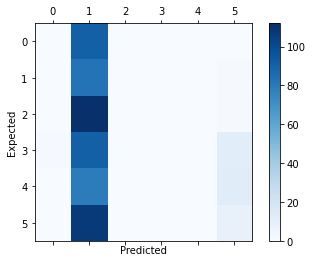

In [22]:
# Make predictions with the model
predictions = model.predict(X_val)  

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_val, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = df_quality['Altitude'].unique()
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Decision Tree Model

In [23]:
from sklearn import tree

# Create and score a decision tree classifier
clfTree = tree.DecisionTreeClassifier(min_samples_split=4)
clf = clfTree.fit(X_train, y_train)

# Make predictions with the hypertuned model
treePredictions = clf.predict(X_val)
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, treePredictions))

              precision    recall  f1-score   support

       1-500       0.78      0.88      0.82        91
   1000-1500       0.67      0.76      0.72        84
   1500-2000       0.87      0.73      0.80       113
   2000-3000       0.95      0.96      0.96       104
       3000+       0.98      0.99      0.98        92
    500-1000       0.93      0.87      0.90       116

    accuracy                           0.86       600
   macro avg       0.86      0.87      0.86       600
weighted avg       0.87      0.86      0.87       600



In [24]:
print(f"Test Accuracy: {clf.score(X_test_scaled, y_test)}")

Test Accuracy: 0.44642857142857145


# Random Forest Grid Search

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_params = {
    'model': RandomForestClassifier(random_state=5),
    'params' : {
        'n_estimators': [100,1000],  # no of trees
        'min_samples_split':[3, 4],
        'max_samples': [0.2, 0.5]
    }
}

RFclf =  GridSearchCV(model_params['model'], model_params['params'], cv=5, n_jobs=-1, return_train_score=False)
RFclf.fit(X_train, y_train)

print(RFclf.best_params_)
print(RFclf.best_score_)

{'max_samples': 0.5, 'min_samples_split': 3, 'n_estimators': 1000}
0.9088888888888889


In [26]:
print(f"Train Accuracy: {RFclf.score(X_train, y_train)}")
print(f"Validation Accuracy: {RFclf.score(X_val, y_val)}")

Train Accuracy: 0.9946296296296296
Validation Accuracy: 0.9233333333333333


In [27]:
print(f"Test Accuracy: {RFclf.score(X_test_scaled, y_test)}")

Test Accuracy: 0.625
